In [9]:
"""
Plot neural network results for black hole 
mass vs. redshift of the simulated data set
"""
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
def merge_files(file_path):
    """
    Merge the data files for both redshift
    and mass neural network results
    """
    df_z = pd.read_csv('../../data/z_prediction_simulated.csv')
    df_m = pd.read_csv(file_path)
    merged = df_m.merge(df_z, on='ID')
    merged.to_csv('../../data/merged_simulated.csv', index=False)

In [11]:
def plot_mass_simulated_result(file_path):
    """
    Plot neural network results for black hole
    mass vs. redshift of the simulated data set
    """

    # Merge the data files
    merge_files(file_path)

    # Reading the merged file
    df = pd.read_csv('../../data/merged_simulated.csv')
    df = df[(df.Mass_ground_truth != 0)]

    # Plotting mass as a function of redshift 
    plt.figure(figsize=(8, 5))
    sns.set_context('paper')
    sns.set(font='Times New Roman')
    plt.scatter(df['z_ground_truth'], df['Mass_ground_truth'], color='black',
                alpha=.5, s=10, zorder=0, label="Ground Truth")
    plt.scatter(df['z_ground_truth'], df['Mass_prediction'], color='blue',
                label="NN prediction", alpha=.3, s=10)
    plt.title('Neural Network Results for Mass', fontsize=14)
    plt.xlabel('Redshift', fontsize=12)
    plt.ylabel('Mass [logM_sun]', fontsize=12)
    plt.legend()
    plt.show()
    
    # Plotting mass ground truth vs. prediction 
    plt.figure(figsize=(8, 5))
    sns.set_context('paper')
    sns.set(font='Times New Roman')
    ground_truth = plt.plot(df['Mass_ground_truth'], df['Mass_ground_truth'], color='blue', zorder=2)
    scatter = plt.scatter(df['Mass_ground_truth'], df['Mass_prediction'], 
                          color='black', alpha=.5, s=10, zorder=1)
    plt.xlabel('Mass [logM_sun]', fontsize=12)
    plt.ylabel('Mass [logM_sun]', fontsize=12)
    plt.title('Neural Network Results for Mass', fontsize=14)
    plt.legend((ground_truth, scatter), labels=('Ground truth', 'NN prediction'))
    plt.show()

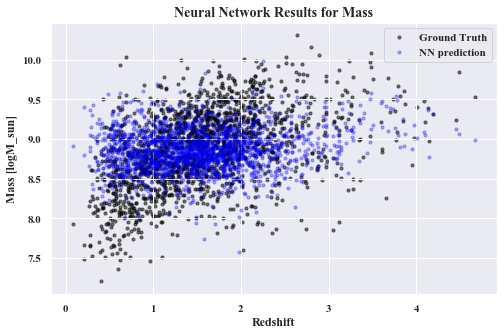

/Users/devanshipratap/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


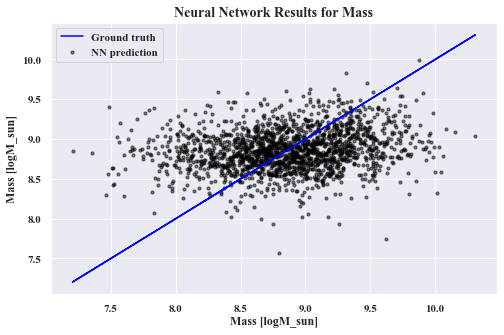

In [12]:
plot_mass_simulated_result('../../data/mass_prediction_simulated.csv')